In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
shree1992_housedata_path = kagglehub.dataset_download('shree1992/housedata')

print('Data source import complete.')


Data source import complete.


In [2]:
!pip install --upgrade pandas==2.0.3 numpy==1.25.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 33.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.0.3 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 2.0.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.
mizani 0.13.2 requires pandas>=2.2.0, but you have pandas 2.0.3 which is incompatible.
blo

In [2]:
!pip install shap

In [3]:
!pip install dice-ml
import dice_ml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense
from tensorflow.keras.models import Model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 43.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.2 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
dask-expr 1.1.21 requires pandas>=2, but you hav

In [4]:
import tensorflow as tf
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

GPU Available:  []


In [5]:
data = pd.read_csv('/kaggle/input/housedata/data.csv')

data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
data['city'].unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [7]:
X = data.drop('price', axis = 1)
y = data['price']

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

X_shuffled, y_shuffled = shuffle(X, y, random_state=42)

In [9]:
X_train = X_shuffled.iloc[: int(0.8 * len(data))]
X_test = X_shuffled.iloc[int(0.8 * len(data)):]
y_train = y_shuffled.iloc[:int(0.8 * len(data))]
y_test = y_shuffled.iloc[int(0.8 * len(data)):]

In [10]:
X_train

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3683,2014-06-30 00:00:00,3.0,2.50,1460,1613,2.0,0,0,3,1180,280,2007,0,6710 Alonzo Ave NW,Seattle,WA 98117,USA
4411,2014-05-22 00:00:00,5.0,2.25,2000,7900,1.0,0,0,4,1300,700,1986,0,3202 S 194th St,SeaTac,WA 98188,USA
2584,2014-06-16 00:00:00,3.0,3.25,2940,5432,3.0,0,3,4,2440,500,1978,2000,150 Highland Dr,Seattle,WA 98109,USA
69,2014-05-04 00:00:00,3.0,2.50,2200,7350,1.0,0,0,5,1570,630,1988,0,13420 SE 182nd St,Renton,WA 98058,USA
1844,2014-06-04 00:00:00,3.0,2.50,1720,8755,1.0,0,0,3,1000,720,1983,2009,31607 45th Pl SW,Federal Way,WA 98023,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,2014-06-06 00:00:00,3.0,2.00,1970,9600,1.0,0,0,4,1300,670,1967,0,2604 S 357th St,Federal Way,WA 98003,USA
2892,2014-06-19 00:00:00,3.0,2.50,2120,7201,2.0,0,0,3,2120,0,2003,0,12200 Densmore Ave N,Seattle,WA 98133,USA
4431,2014-05-29 00:00:00,2.0,1.00,1500,4120,1.5,0,0,3,880,620,1928,1954,220 Garden Ave N,Renton,WA 98057,USA
138,2014-05-05 00:00:00,3.0,2.50,1790,2700,2.0,0,0,3,1790,0,2010,0,4532 185th Ave SE,Issaquah,WA 98027,USA


In [11]:
X_train.shape

(3680, 17)

In [12]:
X_test.shape

(920, 17)

In [13]:
y_train.shape

(3680,)

In [14]:
y_test.shape

(920,)

In [15]:
X_train

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3683,2014-06-30 00:00:00,3.0,2.50,1460,1613,2.0,0,0,3,1180,280,2007,0,6710 Alonzo Ave NW,Seattle,WA 98117,USA
4411,2014-05-22 00:00:00,5.0,2.25,2000,7900,1.0,0,0,4,1300,700,1986,0,3202 S 194th St,SeaTac,WA 98188,USA
2584,2014-06-16 00:00:00,3.0,3.25,2940,5432,3.0,0,3,4,2440,500,1978,2000,150 Highland Dr,Seattle,WA 98109,USA
69,2014-05-04 00:00:00,3.0,2.50,2200,7350,1.0,0,0,5,1570,630,1988,0,13420 SE 182nd St,Renton,WA 98058,USA
1844,2014-06-04 00:00:00,3.0,2.50,1720,8755,1.0,0,0,3,1000,720,1983,2009,31607 45th Pl SW,Federal Way,WA 98023,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,2014-06-06 00:00:00,3.0,2.00,1970,9600,1.0,0,0,4,1300,670,1967,0,2604 S 357th St,Federal Way,WA 98003,USA
2892,2014-06-19 00:00:00,3.0,2.50,2120,7201,2.0,0,0,3,2120,0,2003,0,12200 Densmore Ave N,Seattle,WA 98133,USA
4431,2014-05-29 00:00:00,2.0,1.00,1500,4120,1.5,0,0,3,880,620,1928,1954,220 Garden Ave N,Renton,WA 98057,USA
138,2014-05-05 00:00:00,3.0,2.50,1790,2700,2.0,0,0,3,1790,0,2010,0,4532 185th Ave SE,Issaquah,WA 98027,USA


In [16]:
encoder = LabelEncoder()

X_train.loc[:, 'city'] = encoder.fit_transform(X_train['city'])
X_test.loc[:, 'city'] = encoder.transform(X_test['city'])

<ipython-input-16-5c0925de1bee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:, 'city'] = encoder.fit_transform(X_train['city'])
<ipython-input-16-5c0925de1bee>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train.loc[:, 'city'] = encoder.fit_transform(X_train['city'])
<ipython-input-16-5c0925de1bee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [17]:
X_train

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3683,2014-06-30 00:00:00,3.0,2.50,1460,1613,2.0,0,0,3,1180,280,2007,0,6710 Alonzo Ave NW,35,WA 98117,USA
4411,2014-05-22 00:00:00,5.0,2.25,2000,7900,1.0,0,0,4,1300,700,1986,0,3202 S 194th St,34,WA 98188,USA
2584,2014-06-16 00:00:00,3.0,3.25,2940,5432,3.0,0,3,4,2440,500,1978,2000,150 Highland Dr,35,WA 98109,USA
69,2014-05-04 00:00:00,3.0,2.50,2200,7350,1.0,0,0,5,1570,630,1988,0,13420 SE 182nd St,32,WA 98058,USA
1844,2014-06-04 00:00:00,3.0,2.50,1720,8755,1.0,0,0,3,1000,720,1983,2009,31607 45th Pl SW,14,WA 98023,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,2014-06-06 00:00:00,3.0,2.00,1970,9600,1.0,0,0,4,1300,670,1967,0,2604 S 357th St,14,WA 98003,USA
2892,2014-06-19 00:00:00,3.0,2.50,2120,7201,2.0,0,0,3,2120,0,2003,0,12200 Densmore Ave N,35,WA 98133,USA
4431,2014-05-29 00:00:00,2.0,1.00,1500,4120,1.5,0,0,3,880,620,1928,1954,220 Garden Ave N,32,WA 98057,USA
138,2014-05-05 00:00:00,3.0,2.50,1790,2700,2.0,0,0,3,1790,0,2010,0,4532 185th Ave SE,16,WA 98027,USA


In [18]:
X_train['Age'] = 2025 - X_train['yr_built']
X_test['Age'] = 2025 - X_test['yr_built']

<ipython-input-18-8ac114fed085>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age'] = 2025 - X_train['yr_built']
<ipython-input-18-8ac114fed085>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Age'] = 2025 - X_test['yr_built']


In [19]:
X_train = X_train.drop(['yr_built'], axis = 1)
X_test = X_test.drop(['yr_built'], axis = 1)

In [20]:
import numpy as np

In [21]:
X_train['Renovated'] = np.where(X_train['yr_renovated'] == 0, 0, 1)
X_test['Renovated'] = np.where(X_test['yr_renovated'] == 0, 0, 1)

X_train = X_train.drop(['yr_renovated'], axis = 1)
X_test = X_test.drop(['yr_renovated'], axis = 1)

In [22]:
X_train.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,Age,Renovated
count,3680.000000,3680.000000,3680.000000,3.680000e+03,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000
mean,3.404891,2.172622,2144.556250,1.472787e+04,1.514810,0.006793,0.247554,3.451087,1830.584783,313.971467,25.625543,53.858967,0.405978
std,0.905828,0.791562,967.914475,3.667617e+04,0.541168,0.082153,0.789211,0.678004,862.050456,466.661455,11.997893,29.706564,0.491147
min,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,0.000000,11.000000,0.000000
25%,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,17.000000,28.000000,0.000000
50%,3.000000,2.250000,1975.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,32.000000,49.000000,0.000000
75%,4.000000,2.500000,2620.000000,1.090875e+04,2.000000,0.000000,0.000000,4.000000,2303.000000,610.000000,35.000000,74.000000,1.000000
max,7.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,43.000000,125.000000,1.000000


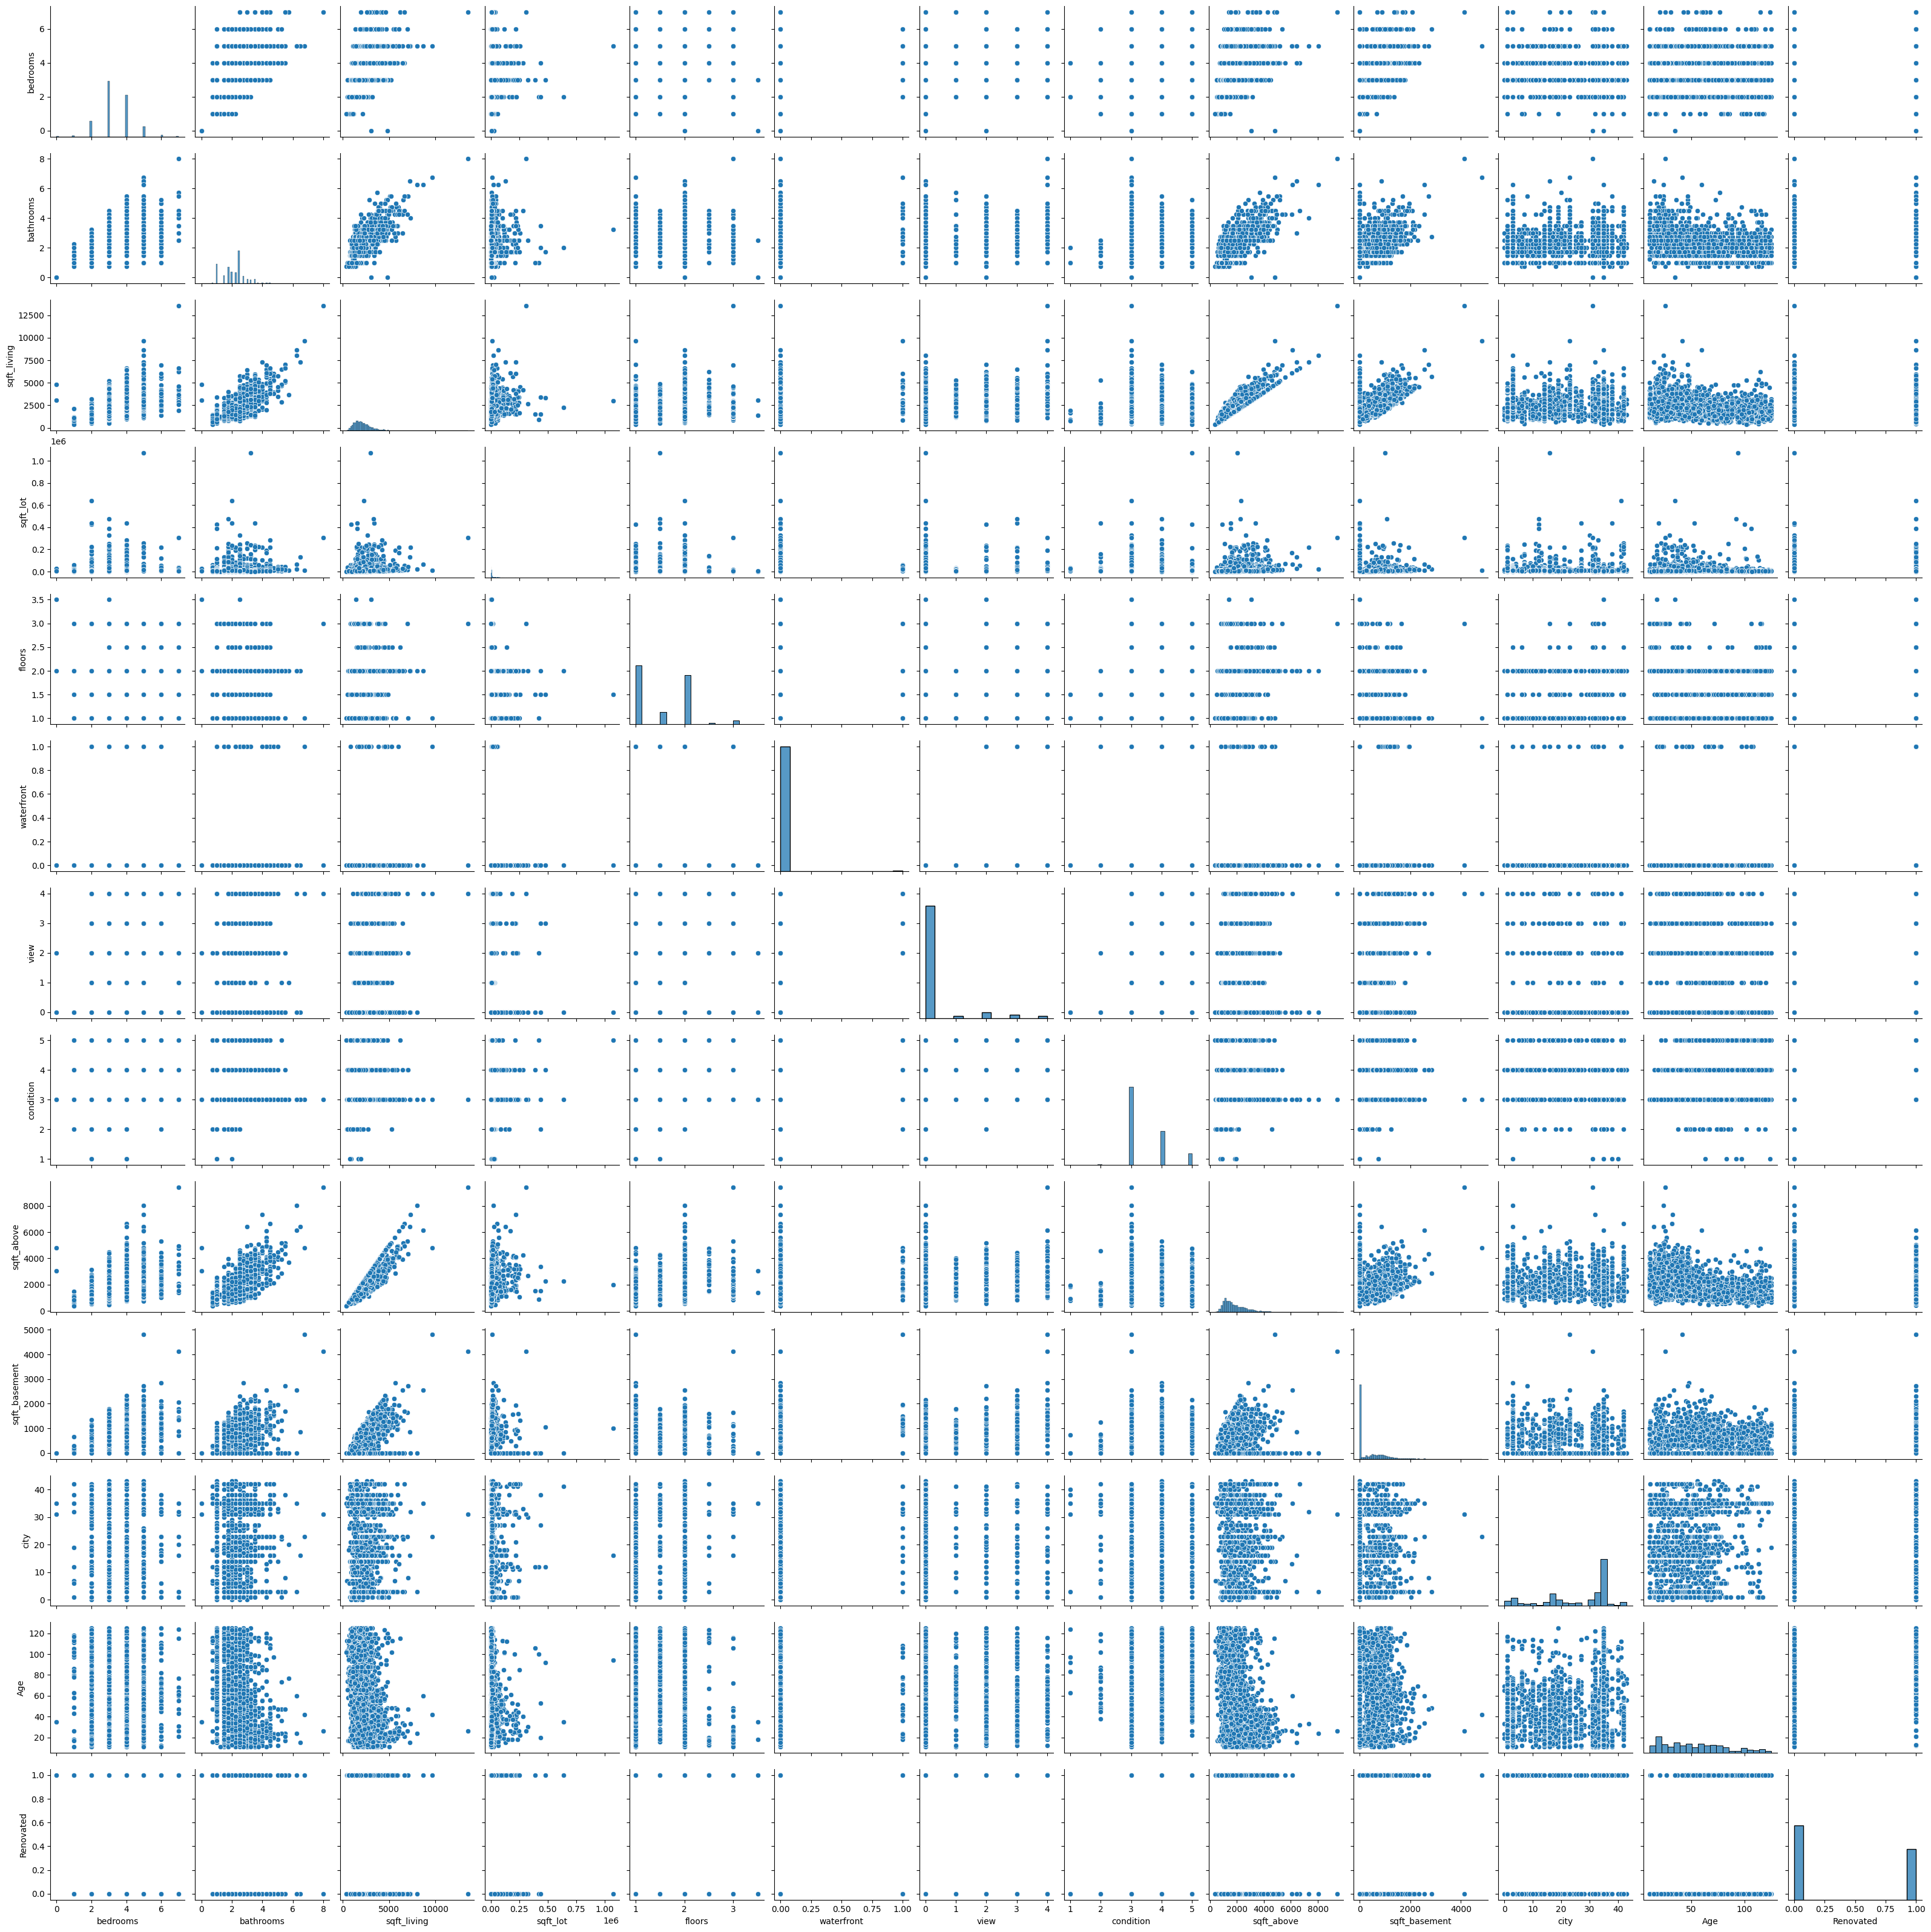

In [23]:
import seaborn as sns

sns.pairplot(X_train)
plt.show()

In [24]:
from tensorflow.keras.models import Sequential

city = data['city'].nunique()

In [25]:
city_input = Input(shape=(1,), name='city_input')
city_embeds = Embedding(input_dim = city, output_dim = 5)(city_input)
city_flat = Flatten()(city_embeds)

In [26]:
X_train_city = X_train['city']

In [27]:
X_train_num = X_train.drop(['city'], axis = 1)

X_train_num = X_train_num.drop(['date', 'street', 'statezip', 'country'], axis = 1)

X_train_num_variance = X_train_num.var()
low_variance_cols = X_train_num_variance[X_train_num_variance < 1e-6].index
X_train_num = X_train_num.drop(columns=low_variance_cols)

In [28]:
# scaler = StandardScaler()
# X_train_num = scaler.fit_transform(X_train_num)

In [29]:
X_train_num

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,Age,Renovated
3683,3.0,2.50,1460,1613,2.0,0,0,3,1180,280,18,0
4411,5.0,2.25,2000,7900,1.0,0,0,4,1300,700,39,0
2584,3.0,3.25,2940,5432,3.0,0,3,4,2440,500,47,1
69,3.0,2.50,2200,7350,1.0,0,0,5,1570,630,37,0
1844,3.0,2.50,1720,8755,1.0,0,0,3,1000,720,42,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,3.0,2.00,1970,9600,1.0,0,0,4,1300,670,58,0
2892,3.0,2.50,2120,7201,2.0,0,0,3,2120,0,22,0
4431,2.0,1.00,1500,4120,1.5,0,0,3,880,620,97,1
138,3.0,2.50,1790,2700,2.0,0,0,3,1790,0,15,0


In [30]:
num_shape = X_train_num.shape[1]
num_input = Input(shape=(num_shape,), name='numeric_input')
combo = tf.keras.layers.Concatenate()([city_flat,num_input])
layer1 = Dense(128, activation = 'relu')(combo)
layer2 = Dense(64, activation = 'relu')(layer1)

# Main output for prediction
output1 = Dense(1, name='main_output')(layer1)

# Auxiliary output for SHAP (can be the same as the main output)
output2 = Dense(1, name='aux_output')(layer1)


model = Model(inputs = [city_input, num_input], outputs = [output1, output2])
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ city_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 5)      │        220 │ city_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 5)         │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numeric_input       │ (None, 12)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 17)        │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ numeric_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │      2,304 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ main_output (Dense) │ (None, 1)         │        129 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ aux_output (Dense)  │ (None, 1)         │        129 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,782 (10.87 KB)

 Trainable params: 2,782 (10.87 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Convert all object columns in X_train_num to numeric
# Before fitting the model
for col in X_train_num.columns:
    if X_train_num[col].dtype == 'object':
        try:
            X_train_num[col] = pd.to_numeric(X_train_num[col])
        except ValueError:
            # Handle columns that cannot be directly converted
            # You may need to encode categorical columns
            print(f"Column '{col}' could not be converted to numeric. Consider using appropriate encoding.")

# Fit the model after the data type conversion
history = model.fit([X_train_city, X_train_num], [y_train,y_train], epochs=50, batch_size=16, verbose=1)

Epoch 1/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - aux_output_loss: 476870311936.0000 - loss: 949459156992.0000 - main_output_loss: 472588582912.0000
Epoch 2/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 422172131328.0000 - loss: 839663222784.0000 - main_output_loss: 417491124224.0000
Epoch 3/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 391723089920.0000 - loss: 780378767360.0000 - main_output_loss: 388655644672.0000
Epoch 4/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 448328564736.0000 - loss: 893906124800.0000 - main_output_loss: 445577592832.0000
Epoch 5/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 332002263040.0000 - loss: 661310406656.0000 - main_output_loss: 329308274688.0000
Epoch 6/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 435852836864.0000 - loss: 869440290816.0000 - main_output_loss: 433587355648.0000
Epoch 7/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 40131398860

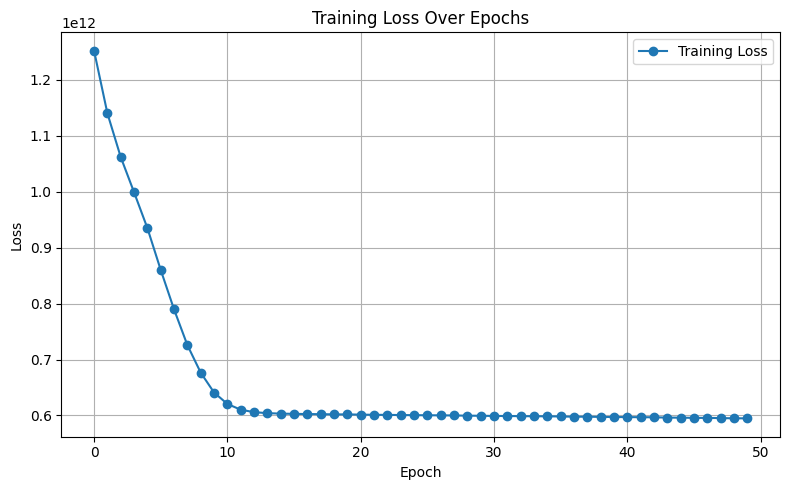

In [32]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
X_test_city = X_test['city']
X_test_num = X_test.drop(['city'], axis = 1)

In [34]:
X_test_num = X_test.drop(['city'], axis = 1)

X_test_num = X_test_num.drop(['date', 'street', 'statezip', 'country'], axis = 1)
X_test_num = X_test_num.drop(columns=low_variance_cols)

In [35]:
# X_test_num = scaler.transform(X_test_num)

In [36]:
for col in X_test_num.columns:
    if X_test_num[col].dtype == 'object':
        try:
            X_test_num[col] = pd.to_numeric(X_test_num[col])
        except ValueError:
            print(f"Column '{col}' could not be converted to numeric. Consider using appropriate encoding")


evals = model.evaluate([X_test_city,X_test_num], [y_test, y_test])

evals

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - aux_output_loss: 87569383424.0000 - loss: 175211184128.0000 - main_output_loss: 87585767424.0000


[156997959680.0, 78086029312.0, 78071349248.0]

In [37]:
preds = model.predict([X_test_city, X_test_num])

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [38]:
print(f"X_train_city shape: {X_train_city.shape}")
print(f"X_train_num shape: {X_train_num.shape}")

X_train_city shape: (3680,)
X_train_num shape: (3680, 12)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
3241/3241 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
3241/3241 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
3241/3241 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
3241/3241 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
3241/3241 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
3241/3241 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
3241/3241 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
3241/3241 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
3241/3241 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
3241/3241 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
3241/3241 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
3241/3241 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

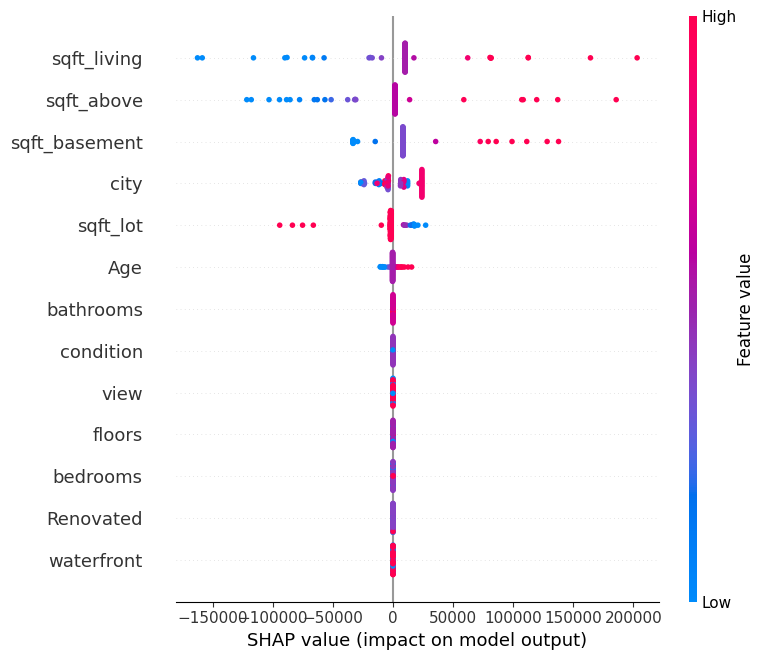

In [39]:
import shap
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Combine categorical and numerical for SHAP
X_train_city_2d = np.array(X_train_city).reshape(-1, 1)
X_test_city_2d = np.array(X_test_city).reshape(-1, 1)

# Drop low-variance columns
X_train_num_variance = X_train_num.var()
low_variance_cols = X_train_num_variance[X_train_num_variance < 1e-6].index
X_train_num = X_train_num.drop(columns=low_variance_cols)
X_test_num = X_test_num.drop(columns=low_variance_cols)

# Rebuild full datasets
X_train_full = pd.concat([pd.DataFrame(X_train_city_2d, columns=['city']), X_train_num], axis=1)
X_test_full = pd.concat([pd.DataFrame(X_test_city_2d, columns=['city']), X_test_num], axis=1)

# Impute missing values (same imputer as before)
imputer = SimpleImputer(strategy='mean')
X_train_full_imputed = imputer.fit_transform(X_train_full)
X_test_full_imputed = imputer.transform(X_test_full)

X_train_full = pd.DataFrame(X_train_full_imputed, columns=X_train_full.columns)
X_test_full = pd.DataFrame(X_test_full_imputed, columns=X_train_full.columns)

def predict_fn(data):
    city_data = data[:, 0].astype(int).reshape(-1, 1)
    num_data = data[:, 1:]
    predictions = model.predict([city_data, pd.DataFrame(num_data, columns=X_train_num.columns)])[0]
    return predictions.ravel()

background = X_train_full.iloc[:50, :].values

explainer = shap.KernelExplainer(predict_fn, background)

shap_values = explainer.shap_values(X_test_full.iloc[:100].values)
shap.summary_plot(shap_values, X_test_full.iloc[:100], feature_names=X_train_full.columns)

In [53]:
!jupyter nbconvert --ClearMetadataPreprocessor.enabled=True --clear-output --inplace Explainable_house_predictions.ipynb

[NbConvertApp] WARNING | pattern 'Explainable_house_predictions.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=T